# Microsoft Needs Analysis

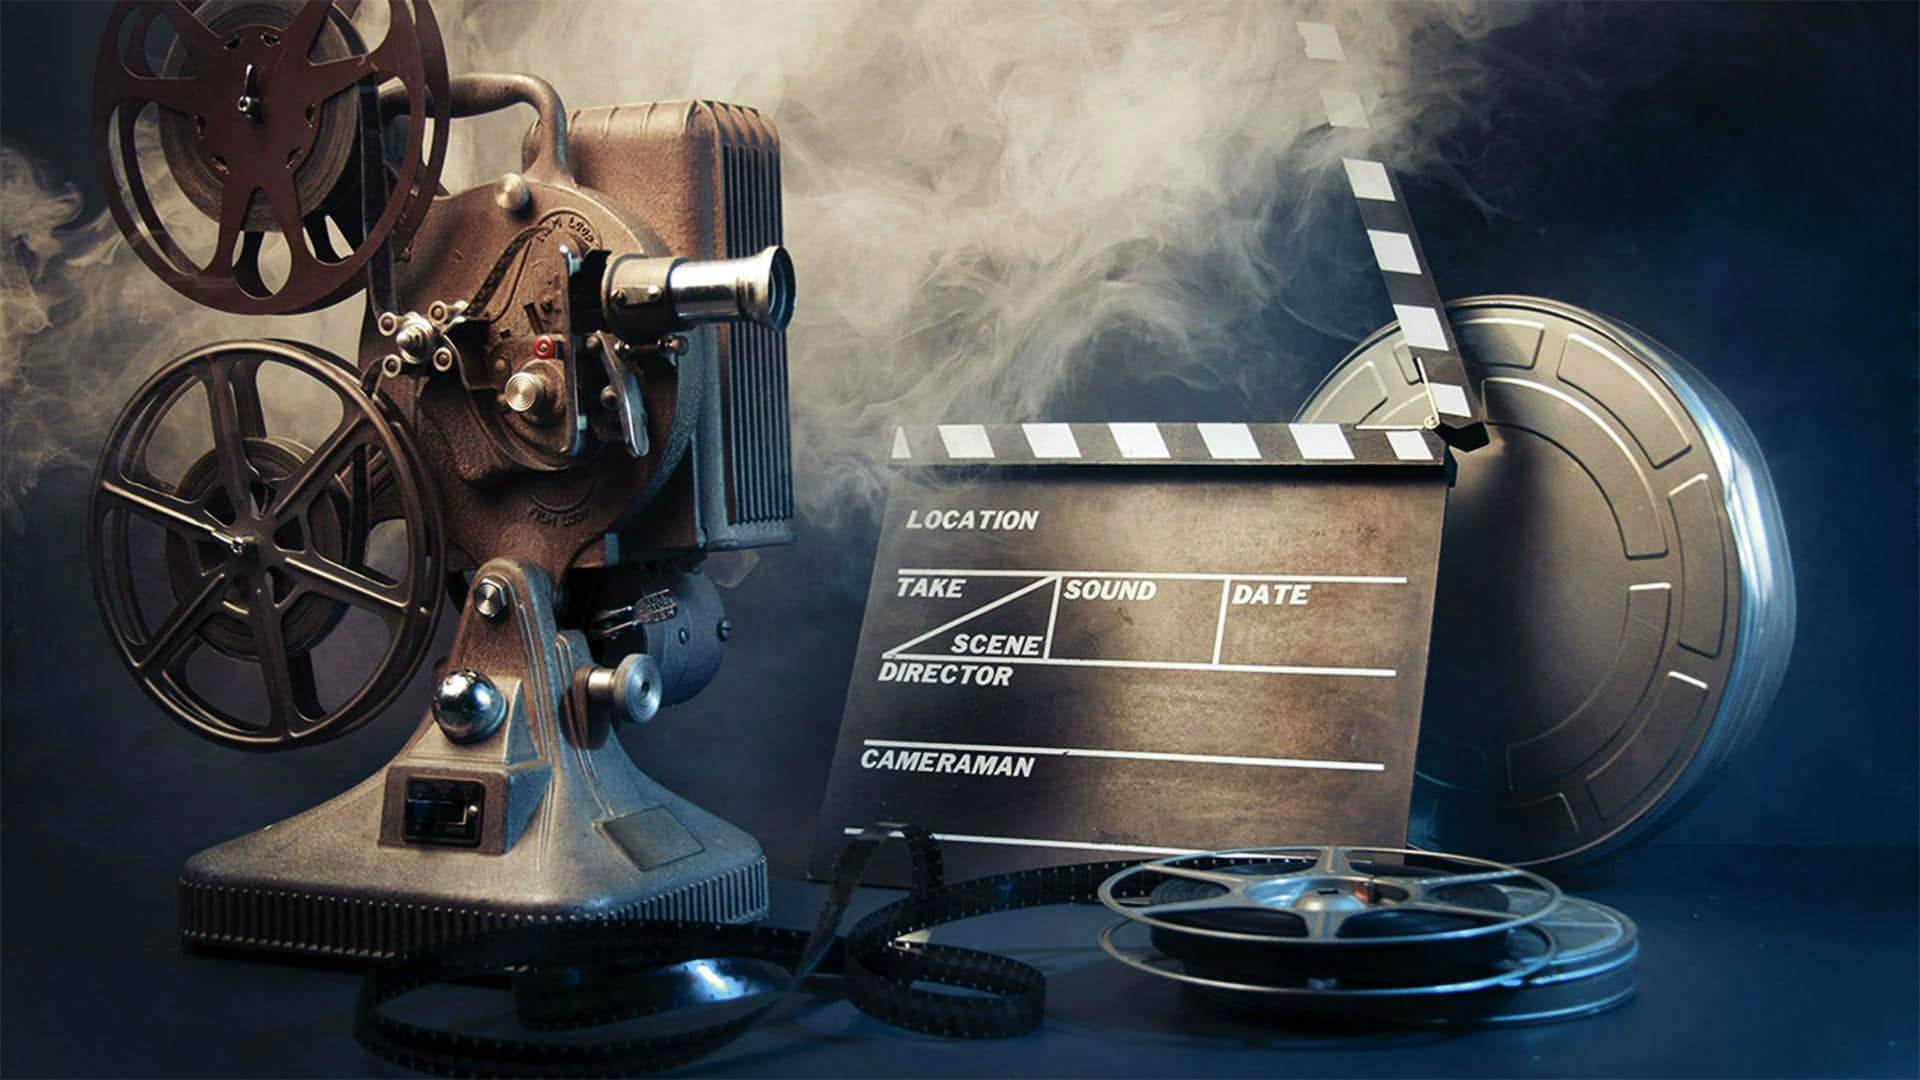

### Authore: Mitra Zamani

<hr style="border:2px solid black">

## Overview

This project analyzes the movies databases like imdb for Microsoft. Descriptive analysis of domestic gross, worldwide gross, genres and ratings of movies, help us to find the best genre, runtime duration and type of studio.    

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. using movies databases and analyzing them, I describe what types of films are currently doing the best at the box office and midb. I find the best genre, runtime duration and type of studio that could help the head of Microsoft's new movie studio to decide what type of films to create.

<hr style="border:2px solid black">

## Data Understanding

the data that I used are from different movies data bases like box office and midb. Every movie has a unique ID. The data files provide the ratings, duration of runtime, genre, type of studio, domestic and worldwide gross of the movies.

<hr style="border:2px solid black">

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
 imdb_title_basics= pd.read_csv('/Users/mitraz/Desktop/Microsoft_project/dsc-phase-1-project/zippedData/imdb.title.basics.csv.gz')

In [3]:
imdb_title_ratings = pd.read_csv('/Users/mitraz/Desktop/Microsoft_project/dsc-phase-1-project/zippedData/imdb.title.ratings.csv.gz')

In [4]:
bom_movie_gross = pd.read_csv('/Users/mitraz/Desktop/Microsoft_project/dsc-phase-1-project/zippedData/bom.movie_gross.csv.gz')

In [5]:
tn_movie_budgets = pd.read_csv('/Users/mitraz/Desktop/Microsoft_project/dsc-phase-1-project/zippedData/tn.movie_budgets.csv.gz')

In [6]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### imdb_title_basics

The imdb_title_basics dataset includes a wide variety of genres,  and length of movie runtime which can be useful and help us to find the best genre and the best duration for the movie that Microsoft wants to create.

In [10]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [11]:
imdb_title_basics['genres'].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: genres, Length: 1085, dtype: int64

In [12]:
imdb_title_basics['runtime_minutes'].value_counts()

90.0     7131
80.0     3526
85.0     2915
100.0    2662
95.0     2549
         ... 
319.0       1
354.0       1
476.0       1
338.0       1
447.0       1
Name: runtime_minutes, Length: 367, dtype: int64

### imdb_title_ratings

The imdb_title_ratings dataset includes average ratings and number of audience votes which can be useful and help us to realize which types of movie have the highest ratings and most of audience like that. 

In [13]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [14]:
imdb_title_ratings[['averagerating', 'numvotes' ]].describe(include = 'all')

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [15]:
imdb_title_ratings['averagerating'].value_counts()

7.0     2262
6.6     2251
7.2     2249
6.8     2239
6.5     2221
        ... 
9.6       18
10.0      16
9.8       15
9.7       12
9.9        5
Name: averagerating, Length: 91, dtype: int64

### bom_movie_gross

The bom_movie_gross dataset includes name of the movies and different types of studios which can be useful and help us to realize what kind of studio is suitable for us. This dataset also includes domestic and foreign gross but I prefer to analyse the movie gross from tn_movie_budgets which is more accurate.

In [16]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [17]:
bom_movie_gross['studio'].value_counts()[:10]

IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64

### tn_movie_budgets

The tn_movie_budgets dataset includes production budget, domestic gross and worldwide gross which can be useful and help us to create a movie with the most profit and the least financial loss compared to the initial budget we have. Also this dataset includes release date which is helpful to find the best time for releasing movie.

In [18]:
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])

In [19]:
tn_movie_budgets['release_month'] = tn_movie_budgets['release_date'].dt.month_name()

In [20]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",June
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",December


## Data Preparation

For the imdb_title_basics, imdb_title_ratings, bom_movie_gross and tn_movie_budgets files, I make them easier to work and read with by removing commas and signs and dropping unnecessary columns.

In [21]:
# Drop unnecessary columns from imdb_title_basics
imdb_title_basics.drop(columns = ['original_title', 'start_year'], inplace=True )

In [22]:
# Drop unnecessary columns from bom_movie_gross
bom_movie_gross.drop(columns = ['year', 'domestic_gross', 'foreign_gross'], inplace = True)

In [23]:
# Drop unnecessary columns from tn_movie_budgets
tn_movie_budgets.drop(columns = ['id', 'release_date'], inplace = True)

In [24]:
# removing commas and signs from tn_movie_budgets
tn_movie_budgets[tn_movie_budgets.columns[1:4]] = tn_movie_budgets[tn_movie_budgets.columns[1:4]].replace('[\$,]', '', regex=True).astype(float)

In [25]:
tn_movie_budgets['foreign_gross'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['domestic_gross']

### Merging Datasets

First I merge imdb_title_basics with imdb_title_ratings on tconst which is primary key here. 

In [26]:
runtime_genres = pd.merge(imdb_title_basics, imdb_title_ratings, on= 'tconst')

In [27]:
 runtime_genres = runtime_genres.sort_values(by= ["averagerating", "numvotes"], ascending=False, kind="mergesort")

In [28]:
 runtime_genres['runtime_minutes'].fillna(runtime_genres['runtime_minutes'].mean(), inplace = True)

In [29]:
# removing commas and organising genres
runtime_genres = runtime_genres.assign(genres = runtime_genres.genres.str.split(',')).explode('genres')

In [30]:
runtime_genres

,tconst,primary_title,runtime_minutes,genres,averagerating,numvotes
73616,tt9715646,Renegade,94.65404,Documentary,10.0,20
50085,tt4960818,Revolution Food,70.00000,Documentary,10.0,8
51109,tt5089804,Fly High: Story of the Disc Dog,65.00000,Documentary,10.0,7
42970,tt4109192,I Was Born Yesterday!,31.00000,Documentary,10.0,6
53408,tt5344358,All Around Us,94.65404,Documentary,10.0,6
...,...,...,...,...,...,...
53923,tt5452328,Tachiiri kinshi Haittara shinu? Norowareta 5 hen,61.00000,Horror,1.0,6
25026,tt2447822,Momok jangan cari pasal!,85.00000,Comedy,1.0,5
63570,tt6792126,Jak se mori revizori,94.65404,Comedy,1.0,5
70740,tt8426154,Pup Scouts,72.00000,Animation,1.0,5


Before merging the datasets, I rename the name of the title columns in bom_movie_gross to movie.

In [31]:
bom_movie_gross = bom_movie_gross.rename(columns = {'title':'movie'})
   

In [32]:
movie_gross =pd.merge(bom_movie_gross, tn_movie_budgets, on= 'movie')

In [33]:
movie_gross['net_profit'] = movie_gross['worldwide_gross'] -  movie_gross['production_budget'] 

In [34]:
movie_gross = movie_gross.sort_values(by="net_profit", ascending=False, kind="mergesort")

In [35]:
movie_gross.head()

,movie,studio,production_budget,domestic_gross,worldwide_gross,release_month,foreign_gross,net_profit
1154,Avengers: Infinity War,BV,300000000.0,678815482.0,2.048134e+09,April,1.369319e+09,1.748134e+09
764,Jurassic World,Uni.,215000000.0,652270625.0,1.648855e+09,June,9.965842e+08,1.433855e+09
765,Furious 7,Uni.,190000000.0,353007020.0,1.518723e+09,April,1.165716e+09,1.328723e+09
1155,Black Panther,BV,200000000.0,700059566.0,1.348258e+09,February,6.481987e+08,1.148258e+09
1156,Jurassic World: Fallen Kingdom,Uni.,170000000.0,417719760.0,1.305773e+09,June,8.880530e+08,1.135773e+09


In [36]:
movie_gross['net_profit'].describe()

count    1.247000e+03
mean     1.051318e+08
std      1.943775e+08
min     -1.104502e+08
25%      2.288380e+06
50%      3.144914e+07
75%      1.187089e+08
max      1.748134e+09
Name: net_profit, dtype: float64

In [37]:
runtime_genres.to_csv('clean_runtime_genres.csv', index = False)

In [38]:
movie_gross.to_csv('clean_movie_gross.csv', index = False)

## Data Modeling

### Question 1: what is the best genre?

by analysing the below graphs which indicate the average rating of each genres, I realized most of the movies are short. This graph help me to find the genres of the movies with the highest ratings.

In [39]:
genres_meanrate = runtime_genres.groupby(['genres']).mean()
genres_meanrate.sort_values(by="averagerating", ascending=False, kind="mergesort")

,runtime_minutes,averagerating,numvotes
genres,,,
Short,18.000000,8.800000,8.000000
Documentary,86.432145,7.332090,266.960232
Game-Show,117.000000,7.300000,1734.500000
News,78.384484,7.271330,212.986183
Biography,90.949296,7.162274,5673.259648
Music,93.318141,7.091972,2771.020833
History,92.692793,7.040956,2776.406726
Sport,92.350571,6.961493,3185.601357
War,96.851037,6.584291,3147.391559


<AxesSubplot:title={'center':'Average Rating for Genres'}, xlabel='genres', ylabel='average rating'>

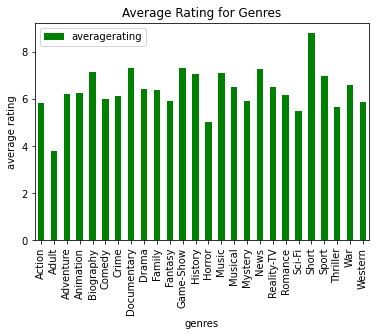

In [40]:
runtime_genres.groupby(['genres']).mean().plot.bar(y = 'averagerating',title='Average Rating for Genres', ylabel = 'average rating', color='green')

### What is the best month of releasing?

This graph indicates the best month of the releasing which is June. Most of the movies that are releasing in the June have the highest average net profit.

<AxesSubplot:title={'center':'best month of release'}, xlabel='release_month', ylabel='average of net profit'>

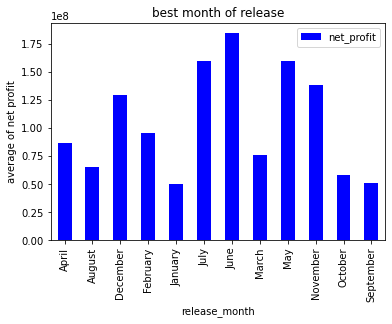

In [41]:
movie_gross.groupby(['release_month']).mean().plot.bar(y = 'net_profit',title='best month of release', ylabel = 'average of net profit', color='blue')

### What is the best type of Movie Studio?

In [42]:
studio_net_profit = movie_gross.groupby(['studio']).mean()
studio_net_profit = studio_net_profit.sort_values(by="net_profit", ascending=False, kind="mergesort")
studio_net_profit = studio_net_profit.head(30)

<AxesSubplot:title={'center':'best studio'}, xlabel='studio', ylabel='average of net profit'>

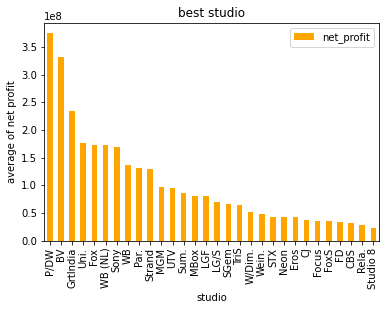

In [43]:
studio_net_profit.plot.bar(y = 'net_profit',title='best studio', ylabel = 'average of net profit', color='orange')

<hr style="border:2px solid black">

## Conclusions


This analysis leads to three recommendations for creating movie to the Microsoft:

1) The genre for the movie that they want to create is better to be Short because the graph indicates that the genre with the highest average rating is short.

2) The best month for releasing movie is June. The graphs indicates the month with the highest average net profit is also June.

3) The best type of movie Studio for creating movie is P/DW. The graphs indicates the studio with the highest average net profit is P/DW.
